In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import util

1. Зашумить изображение при помощи шума гаусса, постоянного шума.

In [30]:
img = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)

In [31]:
gn = np.random.normal(0, 25, img.shape).astype(np.uint8)
img_gn = cv2.add(img, gn)

In [32]:
un = np.random.randint(0, 2, size=img.shape).astype(np.uint8) * 255
img_un = cv2.add(img, un)

2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

In [33]:
mf_gn = cv2.medianBlur(img_gn, 5)
mf_un = cv2.medianBlur(img_un, 5)

In [34]:
gf_gn = cv2.GaussianBlur(img_gn, (5, 5), 0)
gf_un = cv2.GaussianBlur(img_un, (5, 5), 0)

In [35]:
bf_gn = cv2.bilateralFilter(img_gn, 9, 75, 75)
bf_un = cv2.bilateralFilter(img_un, 9, 75, 75)

In [36]:
nlm_gn = cv2.fastNlMeansDenoising(img_gn, None, 10, 7, 21)
nlm_un = cv2.fastNlMeansDenoising(img_un, None, 10, 7, 21)

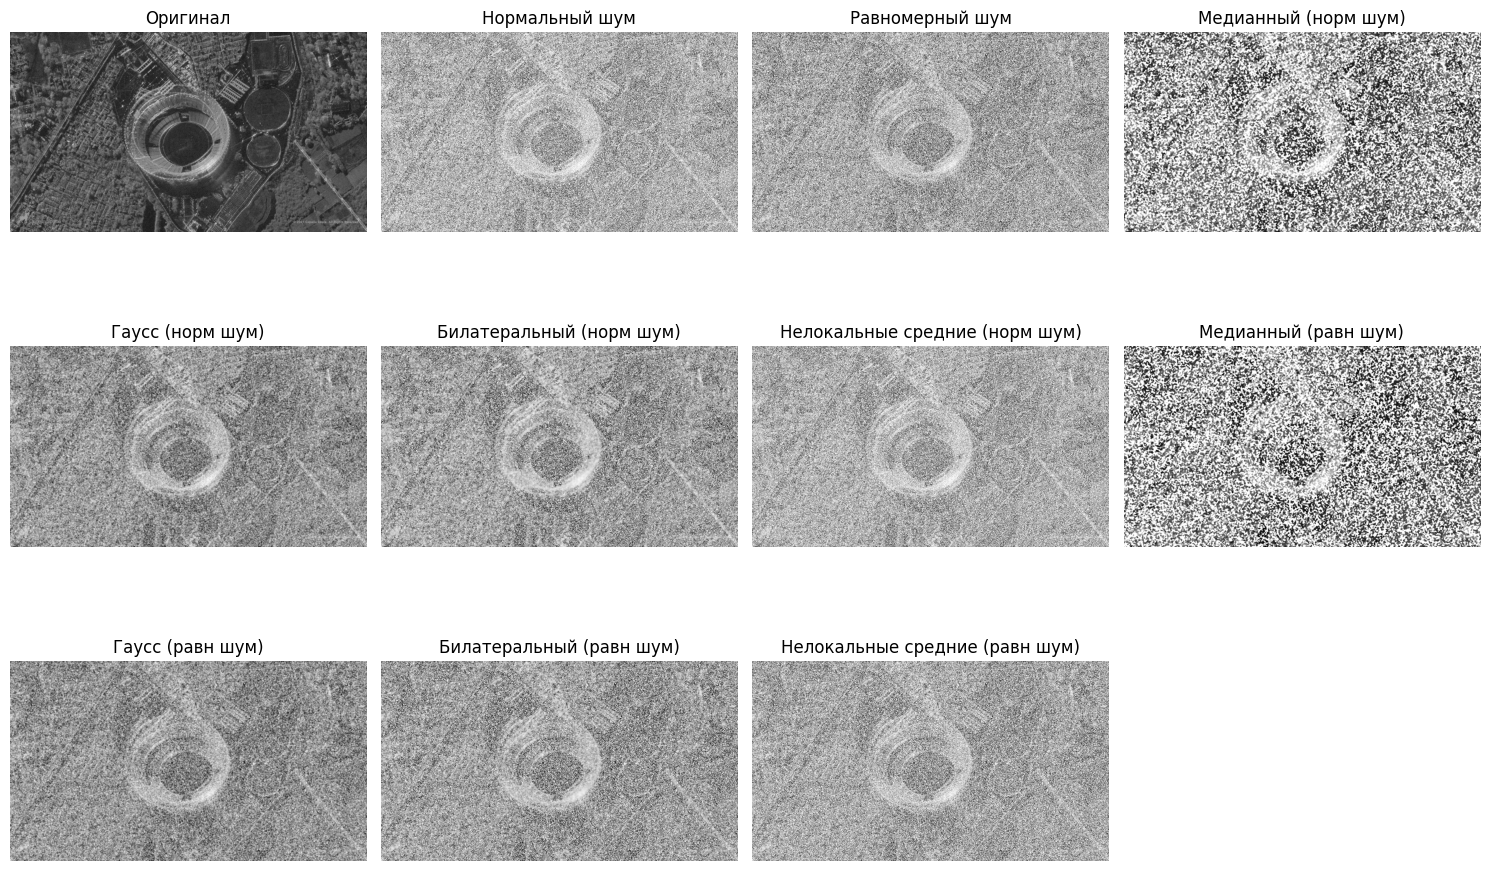

In [37]:
titles = ['Оригинал', 'Нормальный шум', 'Равномерный шум',
          'Медианный (норм шум)', 'Гаусс (норм шум)',
          'Билатеральный (норм шум)', 'Нелокальные средние (норм шум)',
          'Медианный (равн шум)', 'Гаусс (равн шум)',
          'Билатеральный (равн шум)', 'Нелокальные средние (равн шум)']
images = [img, img_gn, img_un, mf_gn, gf_gn, bf_gn, nlm_gn, mf_un, gf_un, bf_un, nlm_un]
plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr


3. Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [38]:
def calculate_psnr(original, filtered):
    mse = np.mean((original.astype(np.float32) - filtered.astype(np.float32)) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse))

In [39]:
psnr_results = {}

In [40]:
psnr_results['Медианный (норм. шум)'] = calculate_psnr(img, mf_gn)
psnr_results['Гаусс (норм. шум)'] = calculate_psnr(img, gf_gn)
psnr_results['Билатеральный (норм. шум)'] = calculate_psnr(img, bf_gn)
psnr_results['Нелок. средние (норм. шум)'] = calculate_psnr(img, nlm_gn)

psnr_results['Медианный (равн. шум)'] = calculate_psnr(img, mf_un)
psnr_results['Гаусс (равн. шум)'] = calculate_psnr(img, gf_un)
psnr_results['Билатеральный (равн. шум)'] = calculate_psnr(img, bf_un)
psnr_results['Нелок. средние (равн. шум)'] = calculate_psnr(img, nlm_un)

In [41]:
print("количественная оценка эффективности фильтров (PSNR)")
print("\nРезультаты PSNR:")
for method, psnr in psnr_results.items():
    print(f"   {method}: {psnr:.2f} dB")

количественная оценка эффективности фильтров (PSNR)

Результаты PSNR:
   Медианный (норм. шум): 6.26 dB
   Гаусс (норм. шум): 8.17 dB
   Билатеральный (норм. шум): 6.74 dB
   Нелок. средние (норм. шум): 6.13 dB
   Медианный (равн. шум): 5.95 dB
   Гаусс (равн. шум): 8.69 dB
   Билатеральный (равн. шум): 6.52 dB
   Нелок. средние (равн. шум): 6.06 dB


In [42]:
best_gn = max([k for k in psnr_results.keys() if 'норм. шум' in k], 
              key=lambda x: psnr_results[x])
best_un = max([k for k in psnr_results.keys() if 'равн. шум' in k], 
              key=lambda x: psnr_results[x])

print(f"\nЛучший фильтр для нормального шума: {best_gn} (PSNR: {psnr_results[best_gn]:.2f} dB)")
print(f"Лучший фильтр для равномерного шума: {best_un} (PSNR: {psnr_results[best_un]:.2f} dB)")



Лучший фильтр для нормального шума: Гаусс (норм. шум) (PSNR: 8.17 dB)
Лучший фильтр для равномерного шума: Гаусс (равн. шум) (PSNR: 8.69 dB)


In [43]:

print("итоговый вывод")

print(f"\n1. Для НОРМАЛЬНО распределенного шума:")
print(f"   - Лучшие результаты показал: {best_gn.split('(')[0].strip()}")
print(f"   - PSNR: {psnr_results[best_gn]:.2f} dB")


print(f"\n2. Для РАВНОМЕРНО распределенного шума:")
print(f"   - Лучшие результаты показал: {best_un.split('(')[0].strip()}")
print(f"   - PSNR: {psnr_results[best_un]:.2f} dB")


итоговый вывод

1. Для НОРМАЛЬНО распределенного шума:
   - Лучшие результаты показал: Гаусс
   - PSNR: 8.17 dB

2. Для РАВНОМЕРНО распределенного шума:
   - Лучшие результаты показал: Гаусс
   - PSNR: 8.69 dB
